In [1]:
from typing import TypedDict,Annotated

from decorator import append
from dotenv import load_dotenv
import os
load_dotenv()

True

In [2]:
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

from langchain.chat_models import init_chat_model
llm = init_chat_model("google_genai:gemini-2.5-flash")


E0000 00:00:1759852659.790371    5613 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


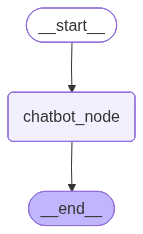

In [3]:
class State(TypedDict):
    messages: Annotated[list,add_messages]

build = StateGraph(State)

def chatbot(state:State)-> State :
    return {"messages": [llm.invoke(state["messages"])]}

build.add_node("chatbot_node", chatbot)
build.add_edge(START, "chatbot_node")
build.add_edge("chatbot_node", END)

app= build.compile()
display(app)




In [4]:
message ={"role":"user", "content":"who landed on moon first ?"}
app.invoke({"messages" : [message]})


{'messages': [HumanMessage(content='who landed on moon first ?', additional_kwargs={}, response_metadata={}, id='dfbe28c3-a767-424f-a372-37852e0bac58'),
  AIMessage(content='**Neil Armstrong** was the first person to land on the Moon.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--bbc8c355-3e19-4abf-a053-f56b00b368c5-0', usage_metadata={'input_tokens': 7, 'output_tokens': 41, 'total_tokens': 48, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 27}})]}

In [5]:
state=None
while True:
    in_message =input("You:")
    if in_message.lower() in {"quit","exit"}:
        break
    if state is None:
        state: State = {
        "messages" :[{"role":"user", "content": in_message}]
        }

    else:
        state["messages"].append({"role":"user","content":in_message})


    state= app.invoke(state)
    print("BOT:",state["messages"][ -1].content)

BOT: While not an official title, the person most commonly referred to as "America's Tariff King" in recent memory, due to his extensive use of and advocacy for tariffs, is **Donald Trump**.

He frequently referred to himself as "Tariff Man" and implemented significant tariffs on various goods, particularly from China, as well as on steel and aluminum imports from multiple countries, during his presidency.

Historically, other figures and periods have been strongly associated with tariffs:

*   **Alexander Hamilton:** As the first Secretary of the Treasury, he advocated for protective tariffs to foster American industries.
*   **Henry Clay:** His "American System" included high protective tariffs to support internal improvements and domestic manufacturing.
*   **The period leading up to the Civil War:** Tariffs were a major point of contention between the industrial North (which favored them) and the agrarian South (which opposed them).
*   **The Gilded Age (late 19th century):** This 

KeyboardInterrupt: Interrupted by user